# Energetic Ion Spectrometer (EIS)
author: Louis Richard

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from pyrfu import mms, pyrf
from pyrfu.plot import plot_line, plot_spectr

Load IGRF coefficients ...


## Define path to data, time interval and spacecraft index

In [ ]:
mms.db_init(default="local", local="/data/mms")
tint_long = ["2017-07-23T16:10:00", "2017-07-23T18:10:00"]
mms_id = 2

## Load data

### Magnetic field in GSE coordinates

In [3]:
# Single spacecraft
b_gse = mms.get_data("b_gse_fgm_srvy_l2", tint_long, mms_id)

[08-Jun-23 17:34:30] INFO: Loading mms2_fgm_b_gse_srvy_l2...


### Single spacecraft H$^+$ (PHxTOF and ExTOF), He$^{n+}$ (ExTOF), O$^{n+}$ (ExTOF) and electrons differential particle fluxes for all 6 telescopes.

In [4]:
# Proton
dpf_phxtof_allt_proton = mms.get_eis_allt(
    "flux_phxtof_proton_srvy_l2", tint_long, mms_id
)
dpf_extof_allt_proton = mms.get_eis_allt("flux_extof_proton_srvy_l2", tint_long, mms_id)
# Oxygen
dpf_extof_allt_oxygen = mms.get_eis_allt("flux_extof_oxygen_srvy_l2", tint_long, mms_id)
# Helium
dpf_extof_allt_helium = mms.get_eis_allt("flux_extof_alpha_srvy_l2", tint_long, mms_id)
# Electron
dpf_een_allt_electron = mms.get_eis_allt(
    "flux_electronenergy_electron_srvy_l2", tint_long, mms_id
)

[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_spin...
[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_sector...
[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_proton_t0_energy_dminus...
[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_proton_t0_energy_dplus...
[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t0...
[08-Jun-23 17:34:30] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_eis_allt.py:147: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  outdict[scope_key] = outdict[scope_key].rename(

[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_look_t0...
[08-Jun-23 17:34:30] INFO: Loading mms2_epd_eis_srvy_l2_phxtof_proton_P4_flux_t1...
[08-Jun-23 17:34:31] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_eis_allt.py:147: UserWarning: rename 

[08-Jun-23 17:34:33] INFO: Loading mms2_epd_eis_srvy_l2_extof_look_t3...
[08-Jun-23 17:34:33] INFO: Loading mms2_epd_eis_srvy_l2_extof_oxygen_P4_flux_t4...
[08-Jun-23 17:34:33] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_eis_allt.py:147: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  outdict[scope_key] = outdict[scope_key].rename(

[08-Jun-23 17:34:33] INFO: Loading mms2_epd_eis_srvy_l2_extof_look_t4...
[08-Jun-23 17:34:33] INFO: Loading mms2_epd_eis_srvy_l2_extof_oxygen_P4_flux_t5...
[08-Jun-23 17:34:33] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/get_eis_allt.py:147: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  outdict[scope_key] = outdict[scope_key].rename(

[08-Jun-23 17:34:33] INFO: Loading mms2_epd_eis_srvy_l2_exto

## Post-processing

### Compute H$^+$ combined PHxTOF and ExTOF differential particle flux for all 6 telescopes

In [5]:
dpf_eis_allt_proton = mms.eis_combine_proton_spec(
    dpf_phxtof_allt_proton, dpf_extof_allt_proton
)

### Spin average H+, He𝑛+ (ExTOF) and O𝑛+ (ExTOF) differential particle fluxes for all 6 telescopes

In [6]:
# Helium
dpf_eis_allt_proton_spin = mms.eis_spin_avg(dpf_eis_allt_proton)

# Helium
dpf_extof_allt_helium_spin = mms.eis_spin_avg(dpf_extof_allt_helium)

# Oxygen
dpf_extof_allt_oxygen_spin = mms.eis_spin_avg(dpf_extof_allt_oxygen)

# Electron
dpf_een_allt_electron_spin = mms.eis_spin_avg(dpf_een_allt_electron)

### Compute H$^+$, He$^{n+}$ (ExTOF) and O$^{n+}$ (ExTOF) omni-directional differential particle fluxes with an without spin averaging

In [7]:
# Helium
dpf_eis_omni_proton = mms.eis_omni(dpf_eis_allt_proton)
dpf_eis_omni_proton_spin = mms.eis_omni(dpf_eis_allt_proton_spin)

# Helium
dpf_extof_omni_helium = mms.eis_omni(dpf_extof_allt_helium)
dpf_extof_omni_helium_spin = mms.eis_omni(dpf_extof_allt_helium_spin)

# Oxygen
dpf_extof_omni_oxygen = mms.eis_omni(dpf_extof_allt_oxygen)
dpf_extof_omni_oxygen_spin = mms.eis_omni(dpf_extof_allt_oxygen_spin)

# Electron
dpf_een_omni_electron = mms.eis_omni(dpf_een_allt_electron)
dpf_een_omni_electron_spin = mms.eis_omni(dpf_een_allt_electron_spin)

### Apply H$^+$ omni-directional differential particle flux cross calibration correction

In [8]:
dpf_eis_omni_proton_corr = mms.eis_proton_correction(dpf_eis_omni_proton)
dpf_eis_omni_proton_spin_corr = mms.eis_proton_correction(dpf_eis_omni_proton_spin)

### Plot in a MMS SDC Quicklook fashion

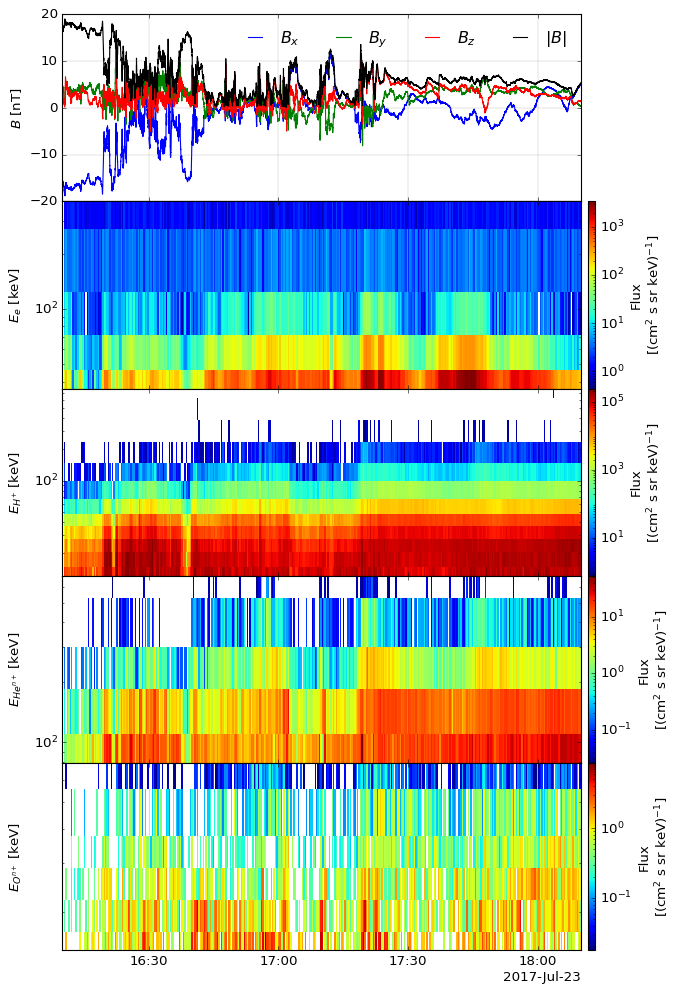

In [9]:
f, axs = plt.subplots(5, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)

plot_line(axs[0], b_gse)
plot_line(axs[0], pyrf.norm(b_gse), color="k")
axs[0].legend(
    ["$B_x$", "$B_y$", "$B_z$", "$|B|$"],
    frameon=False,
    handlelength=1.5,
    loc="upper right",
    ncol=4,
)
axs[0].set_ylabel("$B$ [nT]")
axs[0].set_ylim([-20, 20])

# Electron spin averaged
axs[1], caxs1 = plot_spectr(
    axs[1], dpf_een_omni_electron_spin, yscale="log", cscale="log"
)
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_{e}$ [keV]")

# Proton spin averaged
axs[2], caxs2 = plot_spectr(
    axs[2], dpf_eis_omni_proton_spin_corr, yscale="log", cscale="log"
)
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylabel("$E_{H^{+}}$ [keV]")

# Helium spin averaged
axs[3], caxs3 = plot_spectr(
    axs[3], dpf_extof_omni_helium_spin, yscale="log", cscale="log"
)
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylabel("$E_{He^{n+}}$ [keV]")

# Oxygen spin averaged
axs[4], caxs4 = plot_spectr(
    axs[4], dpf_extof_omni_oxygen_spin, yscale="log", cscale="log"
)
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_{O^{n+}}$ [keV]")

f.align_ylabels(axs)

### Compute H$^{+}$ (PHxTOF and ExTOF), He$^{n+}$, O$^{n+}$ and electron pitch angle distributions

In [10]:
# Low energy proton
dpf_phxtof_pad_proton = mms.eis_pad(dpf_phxtof_allt_proton, vec=b_gse, energy=[10, 50])

# High energy proton
dpf_extof_pad_proton = mms.eis_pad(dpf_extof_allt_proton, vec=b_gse)

# Helium
dpf_extof_pad_helium = mms.eis_pad(dpf_extof_allt_helium, vec=b_gse)

# Oxygen
dpf_extof_pad_oxygen = mms.eis_pad(dpf_extof_allt_oxygen, vec=b_gse)

# Electron
dpf_een_pad_electron = mms.eis_pad(dpf_een_allt_electron, vec=b_gse)

[08-Jun-23 17:34:38] INFO: Using averages in resample
[08-Jun-23 17:34:38] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/eis_pad.py:124: RuntimeWarning: Mean of empty slice
  pa_flux[i, j, :] = np.nanmean(flux_file[i, ind, :], axis=0)

[08-Jun-23 17:34:39] INFO: Using averages in resample
[08-Jun-23 17:34:39] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/eis_pad.py:124: RuntimeWarning: Mean of empty slice
  pa_flux[i, j, :] = np.nanmean(flux_file[i, ind, :], axis=0)

[08-Jun-23 17:34:40] INFO: Using averages in resample
[08-Jun-23 17:34:40] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/eis_pad.py:124: RuntimeWarning: Mean of empty slice
  pa_flux[i, j, :] = np.nanmean(flux_file[i, ind, :], axis=0)

[08-Jun-23 17:34:41] INFO: Using averages in resample
[08-Jun-23 17:34:41] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/eis_pad.py:124: RuntimeWarning: Mean of empty slice
  pa_flux[i, j, :] = np.nanmean(flux_file[i, ind, :], axis=0)

[08-

### Spin average H$^+$, He$^{n+}$ and O$^{n+}$ pitch angle distributions

In [11]:
# Low energy proton
dpf_phxtof_pad_proton_spin = mms.eis_pad_spinavg(
    dpf_phxtof_pad_proton, dpf_phxtof_allt_proton.spin
)

# High energy proton
dpf_extof_pad_proton_spin = mms.eis_pad_spinavg(
    dpf_extof_pad_proton, dpf_extof_allt_proton.spin
)

# Helium
dpf_extof_pad_helium_spin = mms.eis_pad_spinavg(
    dpf_extof_pad_helium, dpf_extof_allt_helium.spin
)

# Oxygen
dpf_extof_pad_oxygen_spin = mms.eis_pad_spinavg(
    dpf_extof_pad_oxygen, dpf_extof_allt_oxygen.spin
)

# Electron
dpf_een_pad_electron_spin = mms.eis_pad_spinavg(
    dpf_een_pad_electron, dpf_een_allt_electron.spin
)

[08-Jun-23 17:34:44] WARNING: /usr/local/lib/python3.10/site-packages/pyrfu/mms/eis_pad_spinavg.py:48: RuntimeWarning: Mean of empty slice
  spin_sum_flux[i, :, :] = np.nanmean(inp.data[idx_, :, :], axis=0)



### Plot

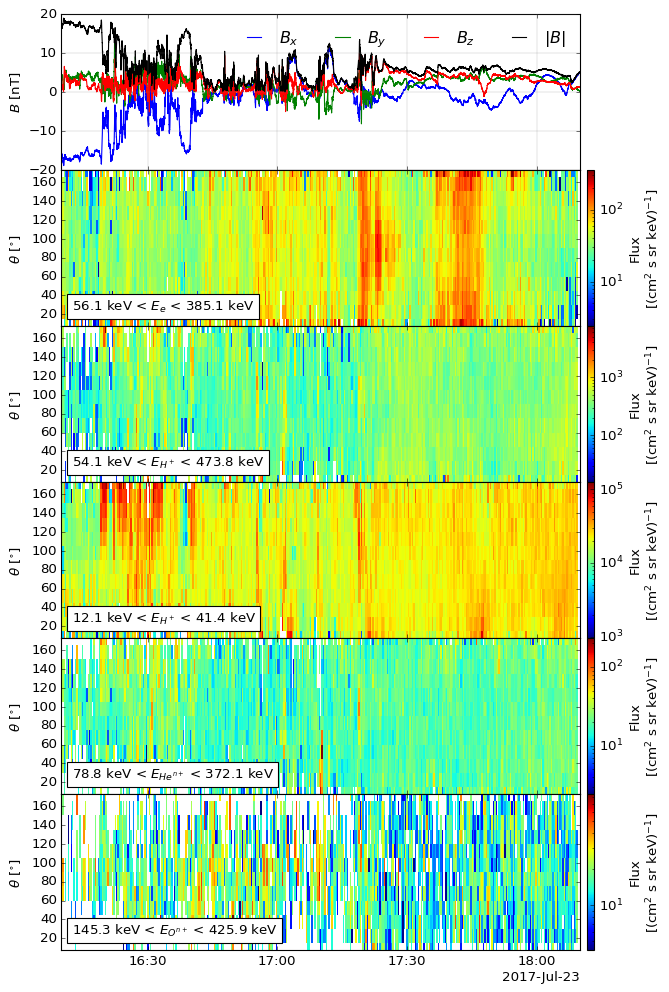

In [12]:
f, axs = plt.subplots(6, sharex="all", figsize=(9, 13))
f.subplots_adjust(hspace=0, left=0.1, right=0.82, bottom=0.05, top=0.95)


plot_line(axs[0], b_gse)
plot_line(axs[0], pyrf.norm(b_gse), color="k")
axs[0].legend(
    ["$B_x$", "$B_y$", "$B_z$", "$|B|$"],
    frameon=False,
    handlelength=1.5,
    loc="upper right",
    ncol=4,
)
axs[0].set_ylabel("$B$ [nT]")
axs[0].set_ylim([-20, 20])

axs[1], caxs1 = plot_spectr(
    axs[1], dpf_een_pad_electron_spin.mean(dim="energy", skipna=True), cscale="log"
)
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_een_pad_electron.energy.data[[0, -1]])
axs[1].text(
    0.02,
    0.1,
    f"{e_min:3.1f} keV < $E_{{e}}$ < {e_max:3.1f} keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[1].transAxes,
)

axs[2], caxs2 = plot_spectr(
    axs[2], dpf_extof_pad_proton_spin.mean(dim="energy", skipna=True), cscale="log"
)
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_proton.energy.data[[0, -1]])
axs[2].text(
    0.02,
    0.1,
    f"{e_min:3.1f} keV < $E_{{H^+}}$ < {e_max:3.1f} keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[2].transAxes,
)

axs[3], caxs3 = plot_spectr(
    axs[3], dpf_phxtof_pad_proton_spin.mean(dim="energy", skipna=True), cscale="log"
)
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_phxtof_pad_proton.energy.data[[0, -1]])
axs[3].text(
    0.02,
    0.1,
    f"{e_min:3.1f} keV < $E_{{H^+}}$ < {e_max:3.1f} keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[3].transAxes,
)

axs[4], caxs4 = plot_spectr(
    axs[4], dpf_extof_pad_helium_spin.mean(dim="energy", skipna=True), cscale="log"
)
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_helium_spin.energy.data[[0, -1]])
axs[4].text(
    0.02,
    0.1,
    f"{e_min:3.1f} keV < $E_{{He^{{n+}}}}$ < {e_max:3.1f} keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[4].transAxes,
)

axs[5], caxs5 = plot_spectr(
    axs[5], dpf_extof_pad_oxygen_spin.mean(dim="energy", skipna=True), cscale="log"
)
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")
e_min, e_max = list(dpf_extof_pad_oxygen_spin.energy.data[[0, -1]])
axs[5].text(
    0.02,
    0.1,
    f"{e_min:3.1f} keV < $E_{{O^{{n+}}}}$ < {e_max:3.1f} keV",
    bbox=dict(fc=(1, 1, 1)),
    transform=axs[5].transAxes,
)


f.align_ylabels(axs)